In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.datasets.cifar10 import load_data
from skimage.color import rgb2gray
import matplotlib.pyplot as pyplot
import numpy as np

Using TensorFlow backend.


In [0]:
def reshape(item, shape):
  item = np.array(item)
  item = np.reshape(item, shape)
  item = item/255.
  return item

In [0]:
def reshape2gray(item, shape):
  item = rgb2gray(item)
  item = np.array(item)
  item = np.reshape(item, shape)
  item = item/255.
  return item

# Load data

In [5]:
(trainX, _), (testX, _) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


# Preprocess

In [0]:
# Reshape training set
feature = reshape2gray(trainX, (50000, 32, 32, 1))
label = reshape(trainX, (50000, 32, 32, 3))

# Reshape testing set
feature_test = reshape2gray(testX, (10000, 32, 32, 1))
label_test = reshape(testX, (10000, 32, 32, 3))

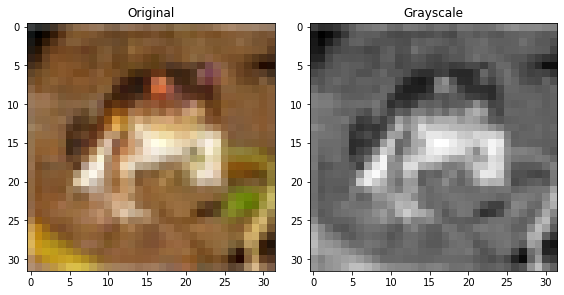

feature shape : (50000, 32, 32, 1)
label shape : (50000, 32, 32, 3)


In [8]:
from skimage.color import rgb2gray
import numpy as np

# convert training set to gray images
feature = rgb2gray(trainX)
label = trainX

# show gray scale image and color image
fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(label[0])
ax[0].set_title("Original")
ax[1].imshow(feature[0], cmap=pyplot.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
pyplot.show()

feature = np.array(feature)
feature = np.reshape(feature, (50000,32,32,1))
feature = feature/255.
label = np.array(label)
label = np.reshape(label, (50000,32,32,3))
label = label/255.
print("feature shape : " + str(feature.shape))
print("label shape : " + str(label.shape))

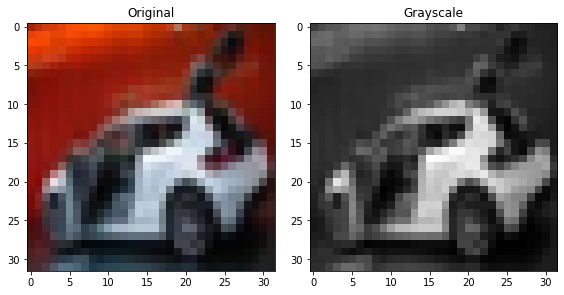

feature_test shape : (10000, 32, 32, 1)
label_test shape : (10000, 32, 32, 3)


In [9]:
from skimage.color import rgb2gray
import numpy as np

# convert training set to gray images
feature_test = rgb2gray(testX)
label_test = testX

# show gray scale image and color image
fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(label_test[6])
ax[0].set_title("Original")
ax[1].imshow(feature_test[6], cmap=pyplot.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
pyplot.show()

feature_test = np.array(feature_test)
feature_test = np.reshape(feature_test, (10000,32,32,1))
feature_test = feature_test/255.
label_test = np.array(label_test)
label_test = np.reshape(label_test, (10000,32,32,3))
label_test = label_test/255.
print("feature_test shape : " + str(feature_test.shape))
print("label_test shape : " + str(label_test.shape))

# define U-Net

In [0]:
# define U-net apply LeakyReLU activation function and Batch Normalization layers
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

def unet(pretrained_weights = None,input_size = (32,32,1)):
    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = LeakyReLU(alpha=0.2)(conv1)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = LeakyReLU(alpha=0.2)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(alpha=0.2)(conv2)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(alpha=0.2)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(alpha=0.2)(conv3)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(alpha=0.2)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU(alpha=0.2)(conv4)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU(alpha=0.2)(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = LeakyReLU(alpha=0.2)(conv5)
    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = LeakyReLU(alpha=0.2)(conv5)
    drop5 = Dropout(0.5)(conv5)


    up6 = Conv2D(512, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU(alpha=0.2)(conv6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU(alpha=0.2)(conv6)

    up7 = Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = LeakyReLU(alpha=0.2)(conv7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = LeakyReLU(alpha=0.2)(conv7)

    up8 = Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = LeakyReLU(alpha=0.2)(conv8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = LeakyReLU(alpha=0.2)(conv8)

    up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = LeakyReLU(alpha=0.2)(conv9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = LeakyReLU(alpha=0.2)(conv9)
    conv9 = Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = LeakyReLU(alpha=0.2)(conv9)
    conv10 = Conv2D(3, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

# Build U-net

In [11]:
input_shape = (32,32,1)
weight_path = '/content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5' # use pre-trained model
model = unet(weight_path, input_shape) # use unet(False, input_shape) for new training
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 32, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   36928       leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

# Train U-net

In [0]:
# Define callback for checkpoint 
from keras import callbacks
checkpoint = callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5', verbose=1) # define save weigth path

In [13]:
his = model.fit(x=feature,
                y=label,
                epochs=15,
                verbose=1,
                callbacks = [checkpoint],
                use_multiprocessing=True)



Epoch 1/15
50000/50000 [==============================] - 100s 2ms/step - loss: 0.5683 - acc: 0.0120

Epoch 00001: saving model to /content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5
Epoch 2/15
50000/50000 [==============================] - 92s 2ms/step - loss: 0.5631 - acc: 0.0121

Epoch 00002: saving model to /content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5
Epoch 3/15
50000/50000 [==============================] - 92s 2ms/step - loss: 0.5621 - acc: 0.0121

Epoch 00003: saving model to /content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5
Epoch 4/15
50000/50000 [==============================] - 94s 2ms/step - loss: 0.5614 - acc: 0.0121

Epoch 00004: saving model to /content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5
Epoch 5/15
50000/50000 [==============================] - 92s 2ms/step - loss: 0.5608 - acc: 0.0121

Epoch 00005: saving model to /content/drive/My Drive/final_ai/test_ver2_onlyUnet_15ep.hdf5
Epoch 6/15
50000/50000 [=============

# Evaluate

In [32]:
# Evaluate model by using loss and accuracy
(data, _), (_, _) = load_data()
X = reshape2gray(data, (50000,32,32,1))
Y = reshape(data, (50000,32,32,3))

loss,acc = model.evaluate(X,Y)
print(loss)
print(acc)

50000/50000 [==============================] - 25s 499us/step
0.556328187122345
0.01207527373496443


# Predict U-net

In [12]:
# Predict result
result = model.predict(feature_test)
print(result.shape)

(10000, 32, 32, 3)


In [0]:
# load original
(_, _), (original, _) = load_data()
original_gray = rgb2gray(original)

(10000, 32, 32, 3)
(10000, 32, 32)
(10000, 32, 32, 3)


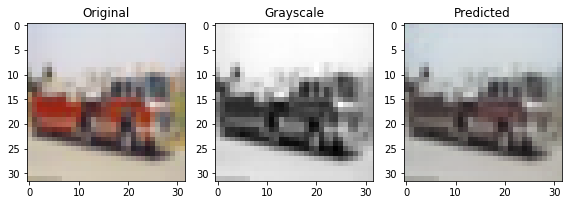

In [14]:
# Show result
item = 8000
print(label_test.shape)
print(original_gray.shape)
print(result.shape)
fig, axes = pyplot.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(label_test[item])
ax[0].set_title("Original")
ax[1].imshow(original_gray[item], cmap=pyplot.cm.gray)
ax[1].set_title("Grayscale")
ax[2].imshow(result[item])
ax[2].set_title("Predicted")

fig.tight_layout()
pyplot.show()